# Exploration of Feasibility

This notebook is used to explore the feasibility of the project. It is not intended to be a final product. Here I explored to see if the eye winking detection was feasible.

## Import relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import idun_sdk # Internal IDUN SDK for preprocessing etc.

## Read the example recording data

In [2]:
recording001FilePath = 'recordings/001.csv'

df = pd.read_csv(recording001FilePath)
df.head() # Example if it works

,timestamp,ch1
0,1.670167e+09,32052.200383
1,1.670167e+09,32077.390799
2,1.670167e+09,32088.700782
3,1.670167e+09,32068.472453
4,1.670167e+09,32077.122578


<AxesSubplot: xlabel='timestamp'>

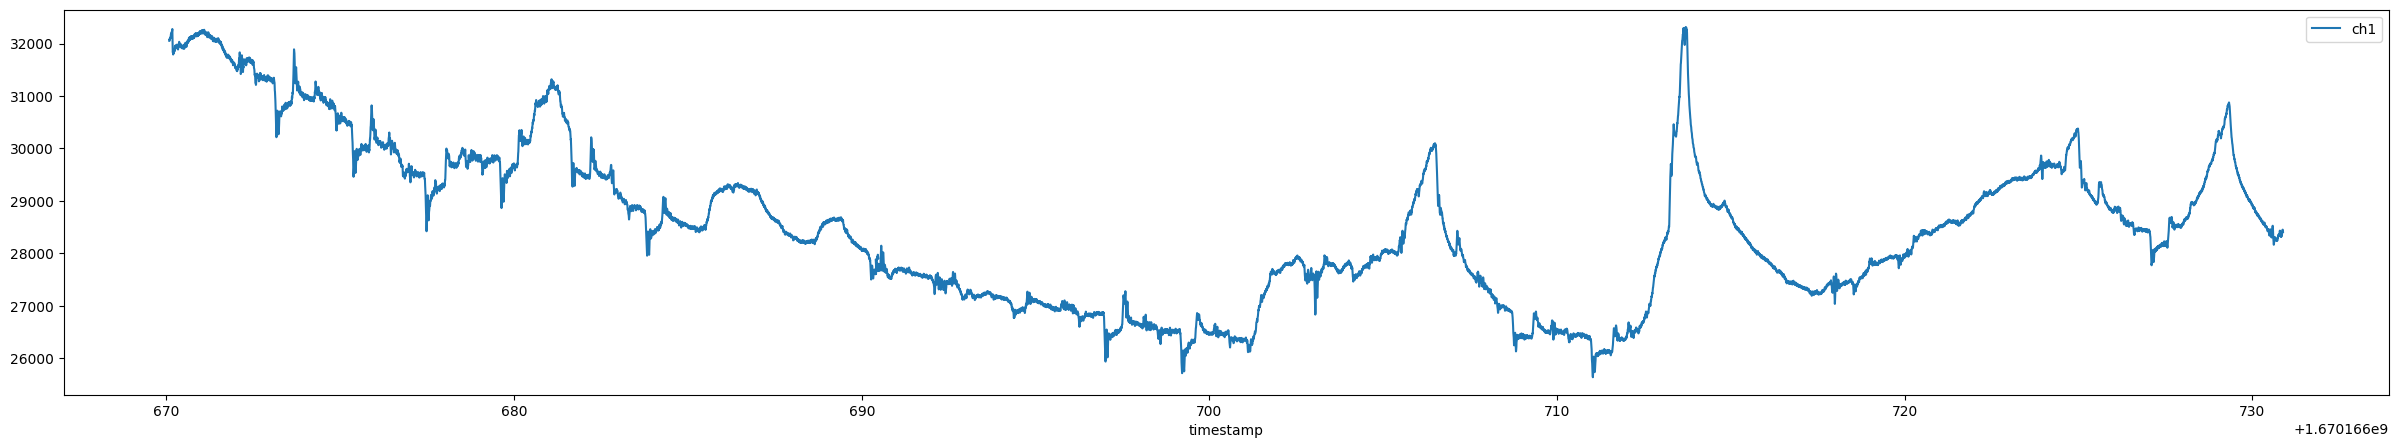

In [3]:
# Plotting the data as a time series
plt.rcParams['figure.figsize'] = [30, 5] # Change the size of the plot
df.plot(x='timestamp', y='ch1') # Only plot channel 1

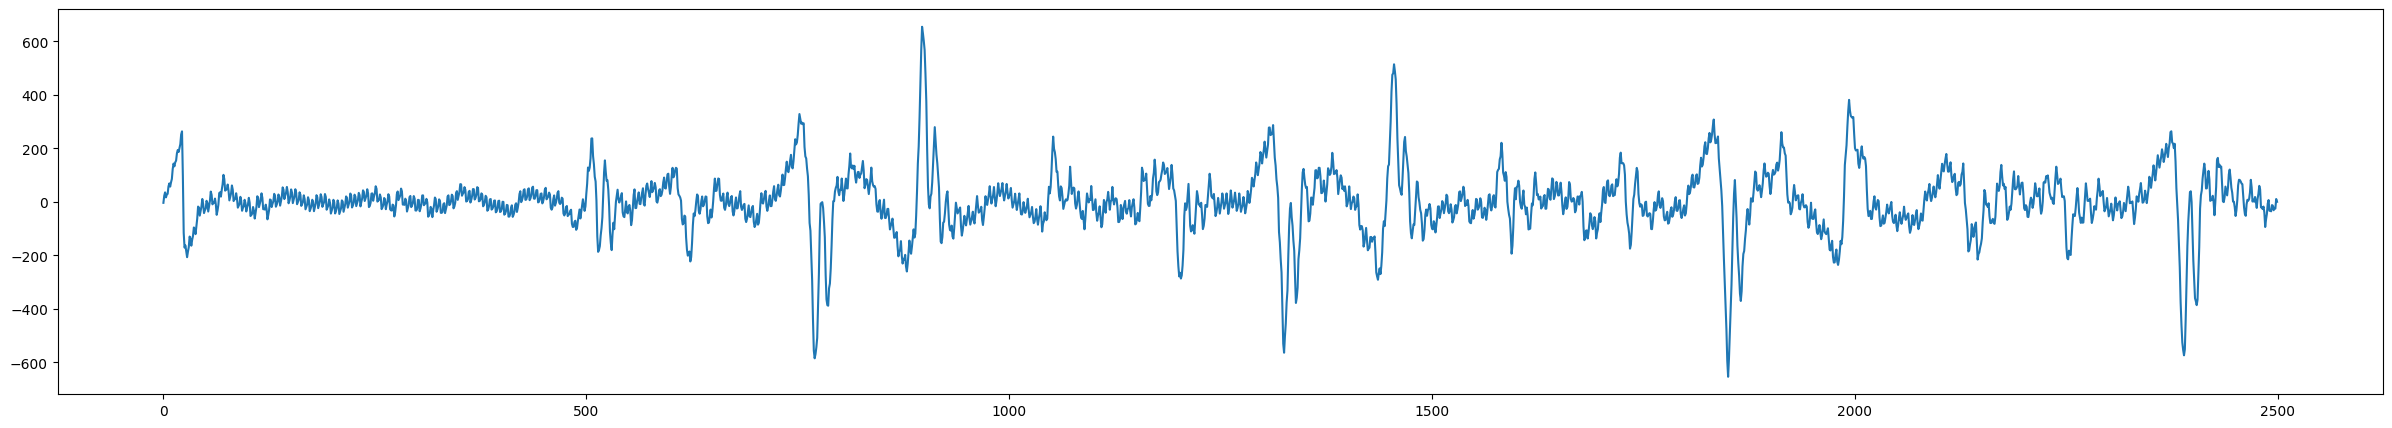

In [4]:
# Get rid of the eeg drift for channel1 via a high pass filter
plt.plot(idun_sdk.do_highpass(df['ch1'][0:2500], 2, 250))

<AxesSubplot: >

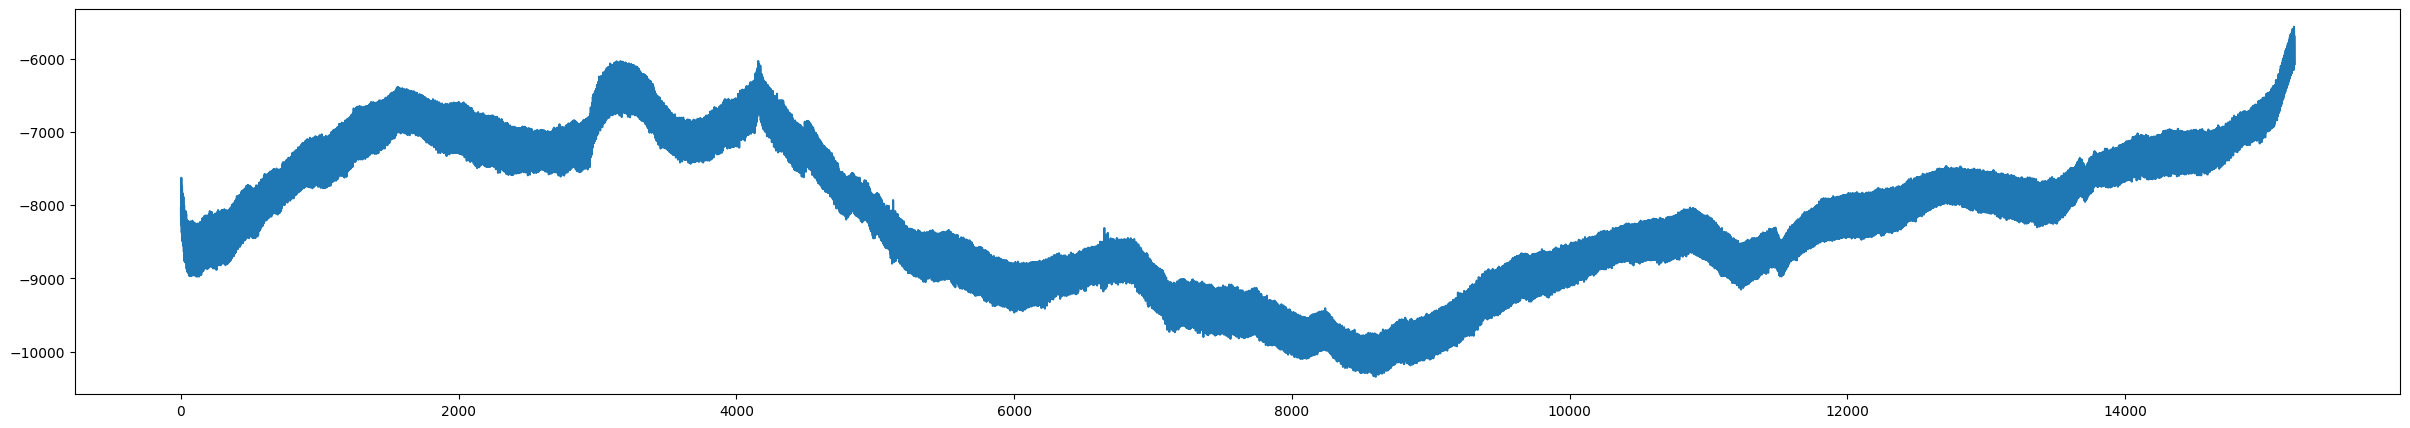

In [5]:
recording002FilePath = pd.read_csv('recordings/002.csv')

# Plot the second recording which was more noisy
recording002FilePath['ch1'].plot()

## Filter the data using a bandpass filter

In [6]:
filtered_slight_blink = idun_sdk.do_bandpass(recording002FilePath['ch1'], [2,35])
filtered_hard_blink = idun_sdk.do_bandpass(df['ch1'], [2,35])

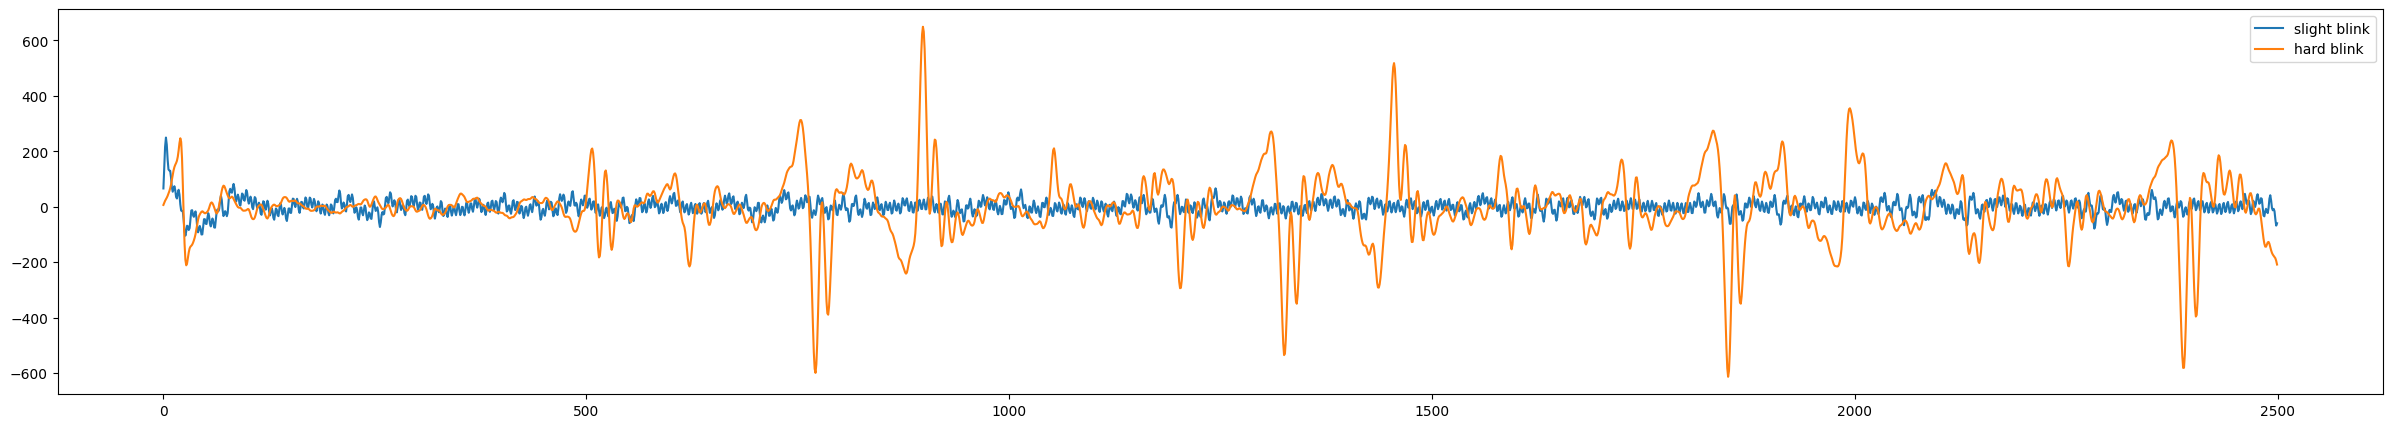

In [7]:
# Overlay the hard blink and the slight blink in a plot
plt.plot(filtered_slight_blink[0:2500])
plt.plot(filtered_hard_blink[0:2500])
plt.legend(['slight blink', 'hard blink'])

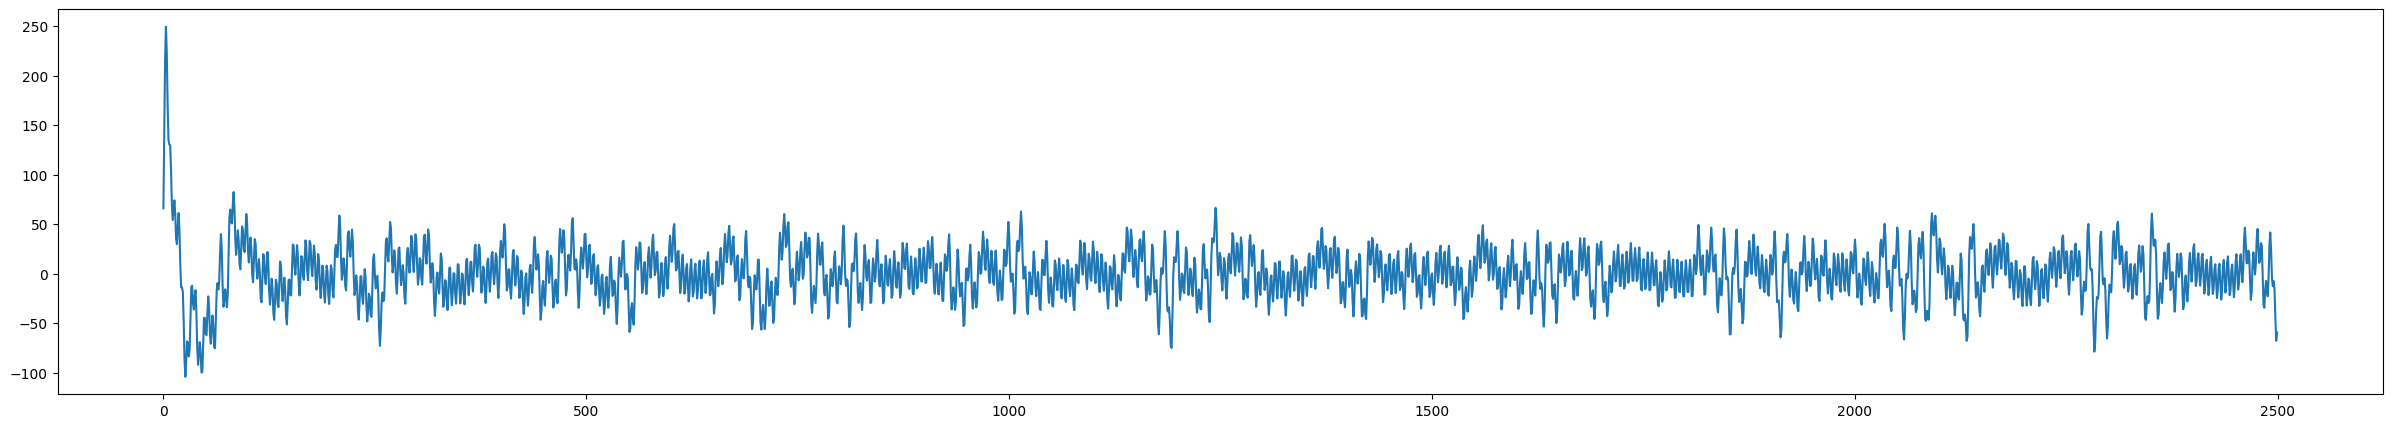

In [8]:
# Just plot the slight blink
plt.plot(filtered_slight_blink[0:2500])

## Take the FFT of the filtered data

In [9]:
idun_sdk_cls = idun_sdk.PreprocessEEGData(250)
fft_slight_blink = idun_sdk_cls.prepare_fft(filtered_slight_blink,2,40)

In [10]:
# Test the FFT data
filtered_slight_blink

array([6.60072398e+01, 1.40721633e+02, 2.16560679e+02, ...,
       6.63571296e+00, 1.58945991e+00, 4.90130159e-11])

Text(0, 0.5, 'PSD')

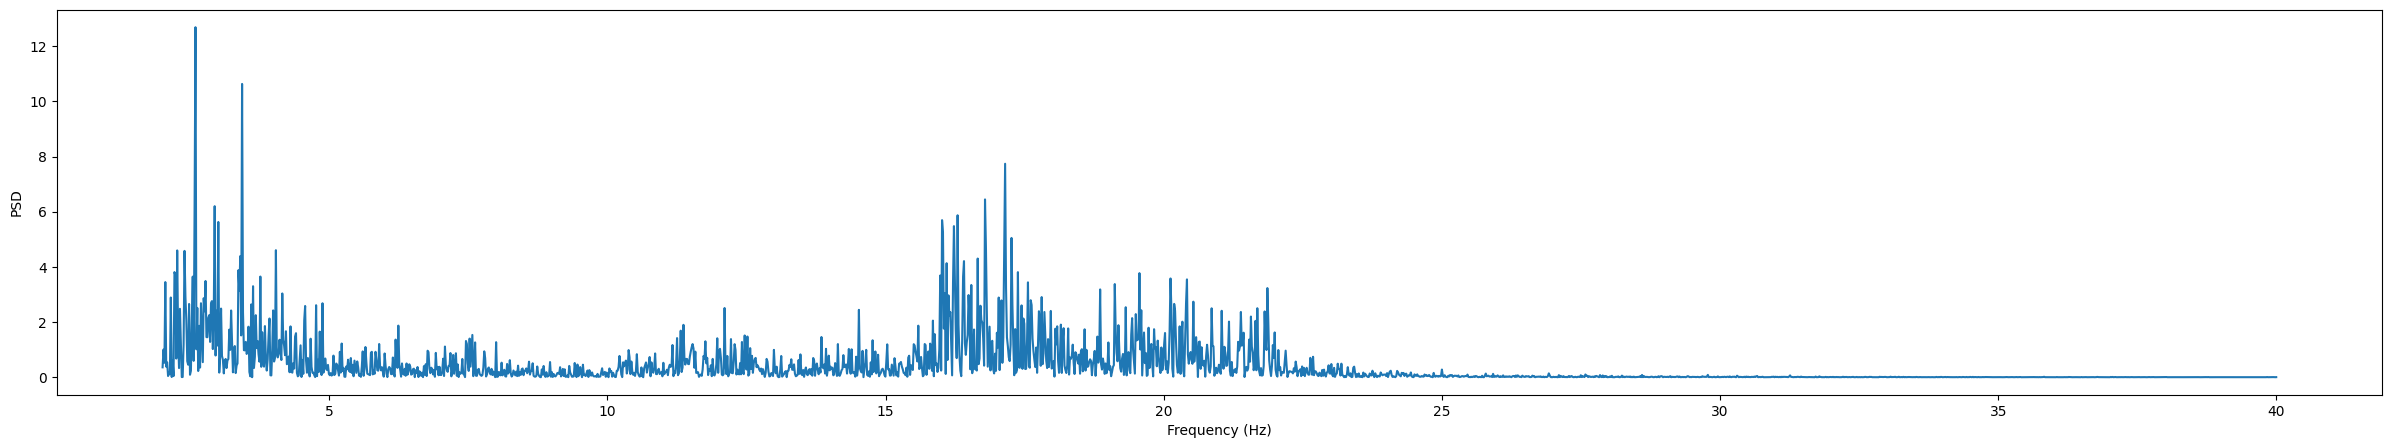

In [11]:
# Plot the FFT data in a frequency domain plot
plt.plot(fft_slight_blink[0], fft_slight_blink[1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

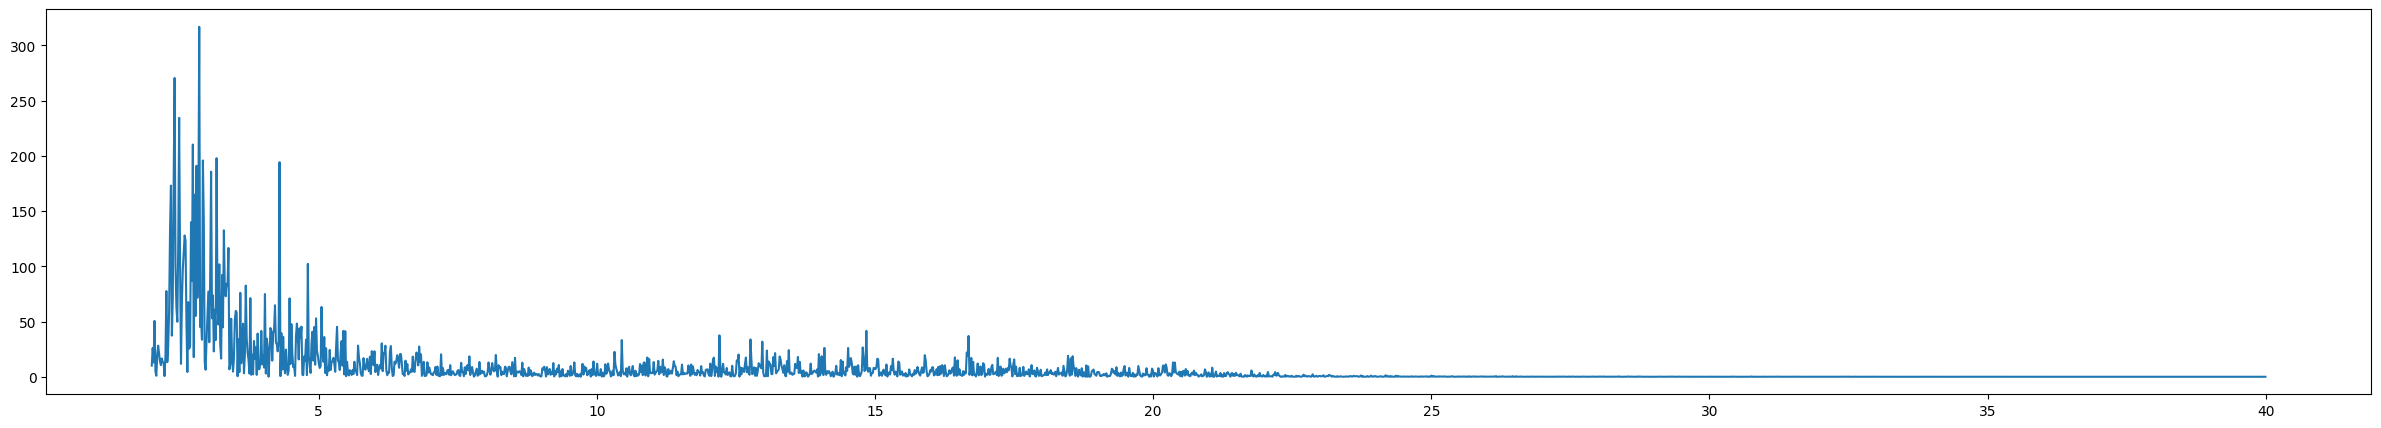

In [12]:
# Plot the FFT data of the hard blink as a frequency domain plot
fft_hard_blink = idun_sdk_cls.prepare_fft(filtered_hard_blink,2,40)
plt.plot(fft_hard_blink[0], fft_hard_blink[1])